In [1]:
#Importing libraries
import os
import cv2
import math
import shutil
import random
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt

In [2]:
#Hyperparameters
population             = 1000  # Number of individuals in the population
number_generation      = 500   # Number of generations
mutation_rate          = 0.01  # Mutation rate
weight_angle           = 2     # Weight of the angle in the drawing
weight_different_cells = 2     # Weight of the difference between the sample picture and the drawing
weight_not_visited     = 16    # Weight of the points in the sample picture that are not in the drawing

In [3]:
#Variables
directions = {1:0, 2:45, 3:90, 4:135, 5:180, 6:225, 7:270, 8:315}
fitness_values = []
fitness_graph = []
image = []
height = 0
width = 0

In [4]:
def create_matrix_from_image(image):
    global height, width
    img = cv2.imread('a9.png')
    height, width, channels = img.shape
    image = np.zeros((height, width)).astype(int)
    for i in range (height):
        for j in range (width):
            if img[i][j][0] != 255:
                image[i][j] = 1
    return image

In [5]:
image = create_matrix_from_image(image)
image

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0,

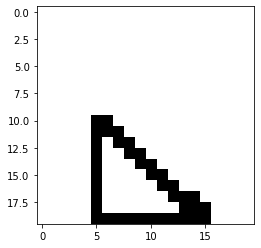

In [6]:
plt.imshow(image, cmap='binary')

In [7]:
def calculate_angle(dir1, dir2):
    """
    Calculate the angle between the two directions.
    """
    if abs(dir1 - dir2) > 180:
        return 360 - abs(dir1 - dir2)
    else:
        return abs(dir1 - dir2)

In [8]:
def movement(x, y, direction):
    """
    The next position of the pen is calculated according to the selected direction.
    """
    if direction == 1:
        return x-1, y
    if direction == 2:
        return x-1, y+1
    if direction == 3:
        return x, y+1
    if direction == 4:
        return x+1, y+1
    if direction == 5:
        return x+1, y
    if direction == 6:
        return x+1, y-1
    if direction == 7:
        return x, y-1
    if direction == 8:
        return x-1, y-1

In [9]:
def check_visited(image):
    """
    Markings are made according to whether the points in the matrix have been visited before.
    """
    for i in range(len(image)):
        for j in range(len(image[i])):
            if image[i][j] != 0:
                image[i][j] = 1
    return image

In [10]:
def compare_images(m1, m2):
    """
    Comparisons are made with the sample picture.
    
    The variable different is incremented by one for each different point between the two images.
    The variable not_visited is incremented by one for points in the sample image that have not yet been visited.
    """
    different = 0
    not_visited = 0
    for i in range(len(m1)):
        for j in range(len(m1[i])):
            if m1[i][j] != m2[i][j]:
                different+=1
            if m2[i][j] == 1 and m1[i][j] == 0:
                not_visited+=1
    return different, not_visited

In [11]:
def creating_drawing(matrix, path, starting_x, starting_y):
    """
    The drawing, which is formed according to the individuals consisting of movements, is transferred to the matrix.
    """
    angle_sum = 0
    different = 0  
    first_move = 0
    x, y = starting_x, starting_y
    matrix[x,y] = 1
    
    for step, rotate in enumerate(path):    
        tmp_x, tmp_y = movement(x, y, rotate)
        #It is checked whether the movement is within the boundaries of the image matrix.
        if not (tmp_x < 0 or tmp_x > width-1 or tmp_y < 0 or tmp_y > height-1):
            if first_move == 0:
                tmp_rotate = rotate
                first_move = 1
            x = tmp_x
            y = tmp_y
            matrix[x,y] = step+2
            #The angle is calculated and the amount of rotation is calculated to be used in the fitness function.
            angle_sum += calculate_angle(directions[tmp_rotate], directions[rotate])
            tmp_rotate = rotate

    different, not_visited=compare_images(matrix, image)
    
    return angle_sum, different, not_visited, matrix

In [12]:
def fitness_values_in_the_drawing(drone_paths, generation):
    """
    The fitness values of the individuals (drawings) in the population are calculated.
    The individual with the best fitness value in each generation is stored and the drawing of this individual is shown to the user at regular intervals.
    """
    global fitness_values
    fitness_values = np.zeros((drone_paths.shape[0],1))
    fit_value = 50
    best_matrix = []
    
    for i,ind in enumerate(drone_paths):
        # Creating a new matrix
        matrix = np.zeros((height, width), dtype=int)
        
        angle_sum, different, not_visited, matrix = creating_drawing(matrix, ind, starting_x, starting_y) 
        normalized_angle_sum = angle_sum / ((drawing_length - 1) * 180)
        normalized_different = different / 16
        normalized_not_visited = not_visited / drawing_length
        fitness = weight_angle*normalized_angle_sum + weight_different_cells*normalized_different + weight_not_visited*normalized_not_visited
        if fitness < fit_value:
            fit_value = fitness
            best_matrix = matrix
        
        fitness_values[i] = fitness
        text = f"{fit_value:.5f}"
        
    if generation % 50 == 0 or generation == 1: # Her 10 generationda bir best_matrix'u yazdırıyoruz.
        fig, ax = plt.subplots()
        check_visited(best_matrix)
        im = ax.imshow(best_matrix, cmap='binary')
        ax.set_title("Generation: "+ str(generation) + "  Fitness value of the best drawing: "+ str(fit_value))
        for i in range(0, height):
            for j in range(0, width):
                text = ax.text(j, i, best_matrix[i, j],
                               ha="center", va="center", color="w") 

In [13]:
def softmax(vector):
    """
    Compute softmax values for each individual.
    """
    e = exp(vector)
    return e / e.sum()

In [14]:
def crossover():
    """
    Produces new drawings with crossover.
    """
    individuals_probabilities = softmax((fitness_values*(-1)).tolist())
    selected_drawings = random.choices(drawings, weights = individuals_probabilities, k = population)
    
    for i in range(0, len(drawings), 2):
        slice_point = random.randint(0, drawing_length-1)         
        temp = selected_drawings[i][0:slice_point]
        selected_drawings[i][0:slice_point]= selected_drawings[i+1][0:slice_point] 
        selected_drawings[i+1][0:slice_point] = temp

    for i, j in enumerate(selected_drawings):
        drawings[i] = j
    return drawings

In [15]:
def mutation(drawings, mutation_rate):
    """
    Random change is made according to the probability of mutation in the sequence representing the drawing.
    """
    mutation = [True, False]
    for i in range(drawings.shape[0]):
        for j in range(drawings.shape[1]):
            #According to the probability of mutation, it is determined whether the mutation will occur or not.
            choice = random.choices(mutation, weights = [mutation_rate, 1-mutation_rate])
            if choice[0]:
                temp = np.random.randint(1, 9, size=1)
                drawings[i][j] = temp
    return drawings

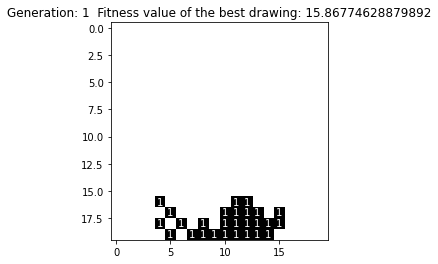

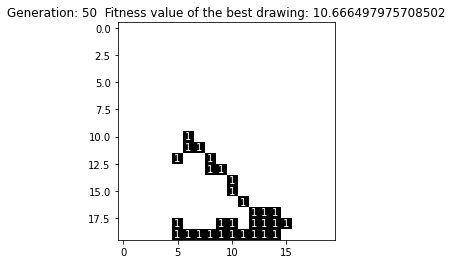

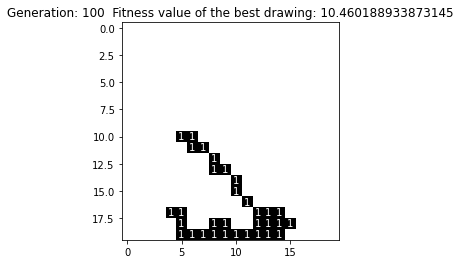

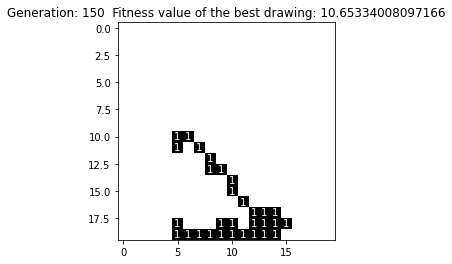

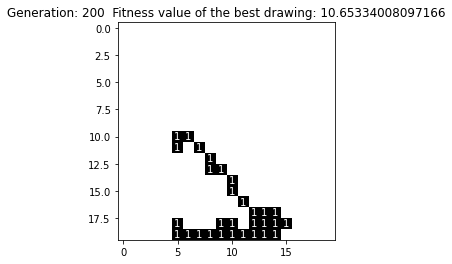

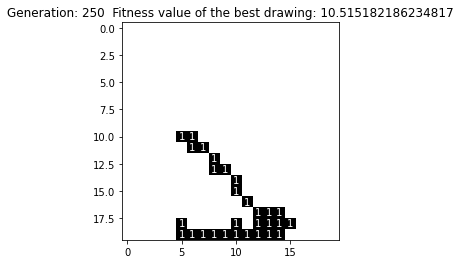

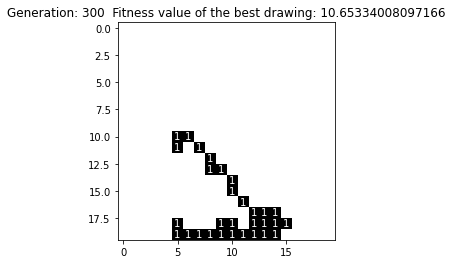

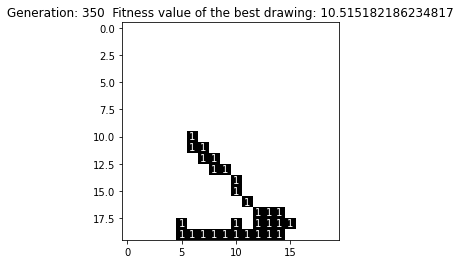

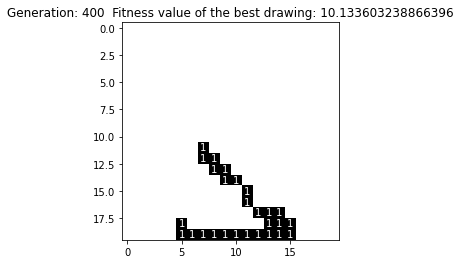

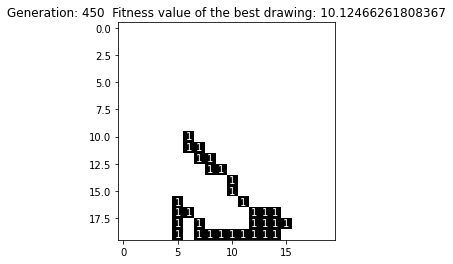

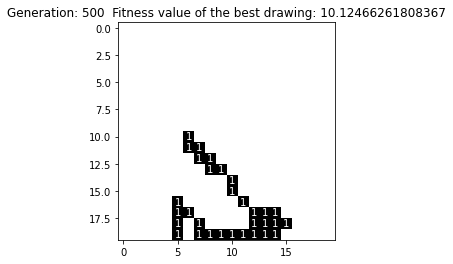

In [16]:
# Searching for starting point to start drawing.
count = 0
for i in range(width):
    for j in range(width):
        if image[i][j] != 0:
            count+=1
drawing_length = count
starting_x = 19
starting_y = 0

for i in range(width):
    if image[height-1][i] == 1:
        starting_y = i
        break

# A drawing population consisting of random movements as long as the drawing length is created.
drawings = np.random.randint(1, 9, size=(population, drawing_length))

for i in range(number_generation):
    fitness_values_in_the_drawing(drawings, i+1)
    index = np.argmin(fitness_values)
    fitness_graph.append(fitness_values[index])
    # Crossover and mutation operations are applied to the drawings.
    drawings = crossover() 
    drawings = mutation(drawings, mutation_rate)

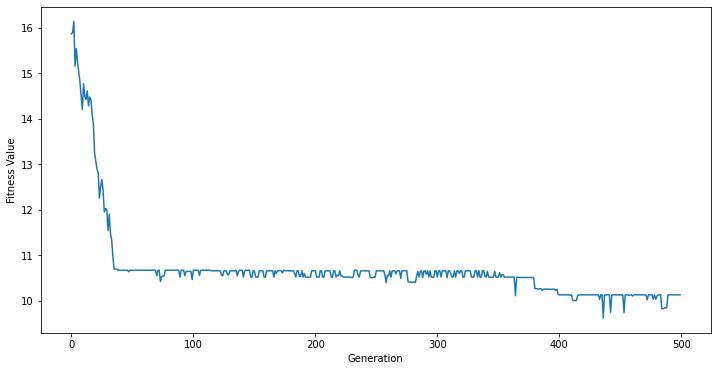

In [17]:
fig, graph = plt.subplots(figsize=(12, 6))
plt.xlabel("Generation")
plt.ylabel("Fitness Value")
graph.plot(fitness_graph)